 ## Pre-processing and Training Data Development

- Goal is to create a cleaned development dataset you can use to complete the modeling step of this project. 

In [1]:
# Import libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import os
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\gosal\Anaconda3_2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
os.getcwd()

'C:\\Shalin\\Springboard bootcamp\\projects\\Capstone project 2\\Capstone Two'

In [3]:
df = pd.read_csv("data/Quora_cleaned.csv")

In [4]:
df.head(5)

,Unnamed: 0,qid,question_stemmed,target,question_length,total_words
0,393959,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12
1,118298,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26
2,1004888,c4ee0b28e195a3d515a5,mention good book containing quotations great ...,0,219,29
3,460851,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,218,32
4,543322,6a71d18ec595137eb634,india harbor many scammers thieves con artists...,1,218,27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016694 entries, 0 to 1016693
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Unnamed: 0        1016694 non-null  int64 
 1   qid               1016694 non-null  object
 2   question_stemmed  1016694 non-null  object
 3   target            1016694 non-null  int64 
 4   question_length   1016694 non-null  int64 
 5   total_words       1016694 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 46.5+ MB


In [6]:
# Drop index columns
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(2)

,qid,question_stemmed,target,question_length,total_words
0,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12
1,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26


In [7]:
# Print the data type of each column
print(df.dtypes)

qid                 object
question_stemmed    object
target               int64
question_length      int64
total_words          int64
dtype: object


### Standardize the magnitude of numeric features using a scaler

In [8]:
# Find the average length of word
df['avg_word_length'] = df['question_length'] / df['total_words']

# Print the first 5 rows of these columns
print(df[['question_stemmed', 'question_length', 'total_words', 'avg_word_length']].head(5))

                                    question_stemmed  question_length  \
0  prospects international students httpwwwophamm...              240   
1  could probing quantum world vacuum virtual par...              221   
2  mention good book containing quotations great ...              219   
3  didnt genghiz khan thee great khan abolish des...              218   
4  india harbor many scammers thieves con artists...              218   

   total_words  avg_word_length  
0           12        20.000000  
1           26         8.500000  
2           29         7.551724  
3           32         6.812500  
4           27         8.074074  


In [9]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int64','float'])
print(numeric_df.columns)

Index(['target', 'question_length', 'total_words', 'avg_word_length'], dtype='object')


In [10]:
# Create subset of only the categorical variable columns
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.columns)

Index(['qid', 'question_stemmed'], dtype='object')


In [11]:
numeric_df['avg_word_length'].describe()

count    1.016694e+06
mean     6.680972e+00
std      1.129022e+00
min      1.933333e+00
25%      6.000000e+00
50%      6.615385e+00
75%      7.375000e+00
max      5.300000e+01
Name: avg_word_length, dtype: float64

In [12]:
# Instantiate StandardScaler to generate the absolute values are mapped in the range [0, 1].
# This is optional step for our dataset since there are not many outliers, however, this condenses data even better

scaler = MaxAbsScaler()

# Fit SS_scaler to the data
scaler.fit(numeric_df[['avg_word_length']])

# Transform the data using the fitted scaler
numeric_df['avg_word_length_scaled'] = scaler.transform(numeric_df[['avg_word_length']])

# Compare the origional and transformed column
print(numeric_df[['avg_word_length_scaled', 'avg_word_length']].head(5))

   avg_word_length_scaled  avg_word_length
0                0.377358        20.000000
1                0.160377         8.500000
2                0.142485         7.551724
3                0.128538         6.812500
4                0.152341         8.074074


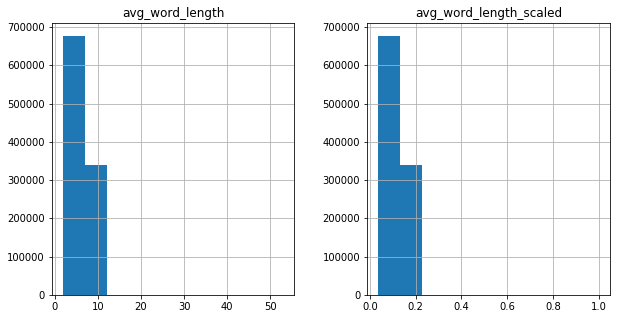

In [13]:
# Create a histogram for the 2 
plt.rcParams["figure.figsize"] = (10,5)

numeric_df.hist(['avg_word_length','avg_word_length_scaled'])
plt.show()

In [14]:
# Drop non scaled column
numeric_df.drop(columns='avg_word_length', inplace=True)
numeric_df.head(5)

,target,question_length,total_words,avg_word_length_scaled
0,0,240,12,0.377358
1,0,221,26,0.160377
2,0,219,29,0.142485
3,1,218,32,0.128538
4,1,218,27,0.152341


In [15]:
numeric_df['avg_word_length_scaled'].describe()

count    1.016694e+06
mean     1.260561e-01
std      2.130230e-02
min      3.647799e-02
25%      1.132075e-01
50%      1.248186e-01
75%      1.391509e-01
max      1.000000e+00
Name: avg_word_length_scaled, dtype: float64

In [16]:
df_numeric_scaled = pd.concat([categorical_df, numeric_df], axis=1, sort=False)
df_numeric_scaled.head(5)

,qid,question_stemmed,target,question_length,total_words,avg_word_length_scaled
0,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12,0.377358
1,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26,0.160377
2,c4ee0b28e195a3d515a5,mention good book containing quotations great ...,0,219,29,0.142485
3,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,218,32,0.128538
4,6a71d18ec595137eb634,india harbor many scammers thieves con artists...,1,218,27,0.152341


In [17]:
df_numeric_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016694 entries, 0 to 1016693
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   qid                     1016694 non-null  object 
 1   question_stemmed        1016694 non-null  object 
 2   target                  1016694 non-null  int64  
 3   question_length         1016694 non-null  int64  
 4   total_words             1016694 non-null  int64  
 5   avg_word_length_scaled  1016694 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 46.5+ MB


### Perform Count vectorization on categorical feature to fit and transform data

In [27]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(4,4))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(df_numeric_scaled['question_stemmed'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

['13 year old boy', '13 year old girl', '14 year old boy', '14 year old girl', '15 year old boy', '15 year old girl', '16 year old boy', '16 year old girl', '18 year old girl', '2017 good time buy', '2018 fifa world cup', '2018 movie greenlit whats', 'able role television series', 'affect way read book', 'asset help improve stay', 'backstory movie got mad', 'best student organizations clubs', 'best student organizations join', 'best things weekends student', 'best way earn money', 'best way lose weight', 'best way make money', 'best way start learning', 'better grades high school', 'bhk flats rent sector', 'bilateral diplomatic foreign relations', 'cost bhk flats rent', 'demographic factors influence crime', 'deny causing black death', 'determine lewis dot structure', 'diplomatic foreign relations pakistan', 'distinguishes writing style used', 'download test bank fundamentals', 'evolve strategic objectives tim', 'experience affect way read', 'factors influence crime rate', 'fifa world 

In [28]:
# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head(5))

Counts_useful tips starting work              575
Counts_good hotels shortterm business         413
Counts_hotels shortterm business travelers    413
Counts_best student organizations join        152
Counts_literary devices used book             124
dtype: int64


In [29]:
df_final = pd.concat([df_numeric_scaled, cv_tri_df], axis=1, sort=False)
df_final.head(5)

,qid,question_stemmed,target,question_length,total_words,avg_word_length_scaled,Counts_13 year old boy,Counts_13 year old girl,Counts_14 year old boy,Counts_14 year old girl,...,Counts_useful tips students starting,Counts_utilize people asset help,Counts_whats backstory movie got,Counts_whats best lyricline song,Counts_whats best way learn,Counts_whats best way make,Counts_whats weirdest thing youve,Counts_writing style structure book,Counts_writing style structure novel,Counts_writing style used book
0,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12,0.377358,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26,0.160377,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,c4ee0b28e195a3d515a5,mention good book containing quotations great ...,0,219,29,0.142485,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,218,32,0.128538,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6a71d18ec595137eb634,india harbor many scammers thieves con artists...,1,218,27,0.152341,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split into testing and training datasets 

In [30]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_final, test_size=0.2)

In [31]:
train_df.shape

(813355, 106)

In [32]:
test_df.shape

(203339, 106)

In [33]:
test_df.head(5)

,qid,question_stemmed,target,question_length,total_words,avg_word_length_scaled,Counts_13 year old boy,Counts_13 year old girl,Counts_14 year old boy,Counts_14 year old girl,...,Counts_useful tips students starting,Counts_utilize people asset help,Counts_whats backstory movie got,Counts_whats best lyricline song,Counts_whats best way learn,Counts_whats best way make,Counts_whats weirdest thing youve,Counts_writing style structure book,Counts_writing style structure novel,Counts_writing style used book
58056,3630d3830c76108c2d8c,democrats think freedom speech applies think o...,1,92,13,0.133527,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
708521,0ba3af7ac1281916f623,change occur britons british,0,28,4,0.132075,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013236,5f33219eab2d400aba80,want spect,0,10,2,0.094340,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211063,57c418083a7a82d79c28,indians less creative native developed countri...,1,59,9,0.123690,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,92d6313fa7df390efe5d,barack obama think would defeated donald trump...,1,197,27,0.137666,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test_df.to_csv("data/FeatureEngineering_Test.csv")

In [35]:
train_df.to_csv("data/FeatureEngineering_Train.csv")